In [1]:
%matplotlib inline

# EEGLAB Topoplots

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import mne

## Create fake data

First we will create a simple evoked object with a single timepoint using
biosemi 10-20 channel layout.



In [3]:
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
n_channels = len(biosemi_montage.ch_names)
fake_info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=250.,
                            ch_types='eeg')

rng = np.random.RandomState(0)
data = rng.normal(size=(n_channels, 1)) * 1e-6
fake_evoked = mne.EvokedArray(data, fake_info)
fake_evoked.set_montage(biosemi_montage)

<Evoked | '' (average, N=1), 0 – 0 sec, baseline off, 64 ch, ~91 kB>

## Calculate data EEG in head (sphere origin and radius)

EEGLAB plots head outline at the level where the head circumference is
measured in the 10-20 system in montage.

In [4]:
# first we obtain the 3d positions of selected channels
chs = ['Oz', 'Fpz', 'T7', 'T8']
# when the montage is set, it is transformed to the "head" coordinate frame
# that MNE uses internally, therefore we need to use
# ``fake_evoked.get_montage()`` to get these properly transformed coordinates
montage_head = fake_evoked.get_montage()
ch_pos = montage_head.get_positions()['ch_pos']
pos = np.stack([ch_pos[ch] for ch in chs])

# now we calculate the radius from T7 and T8 x position
# (we could use Oz and Fpz y positions as well)
radius = np.abs(pos[[2, 3], 0]).mean()

# then we obtain the x, y, z sphere center this way:
# x: x position of the Oz channel (should be very close to 0)
# y: y position of the T8 channel (should be very close to 0 too)
# z: average z position of Oz, Fpz, T7 and T8 (their z position should be the
#    the same, so we could also use just one of these channels), it should be
#    positive and somewhere around `0.03` (3 cm)
x = pos[0, 0]
y = pos[-1, 1]
z = pos[:, -1].mean()

# lets print the values we got:
print([f'{v:0.5f}' for v in [x, y, z, radius]])

['0.00000', '0.00000', '0.03683', '0.09494']


## Compare MNE and EEGLAB channel layout

We already have the required x, y, z sphere center and its radius — we can
use these values passing them to the ``sphere`` argument of many
topo-plotting functions (by passing ``sphere=(x, y, z, radius)``).



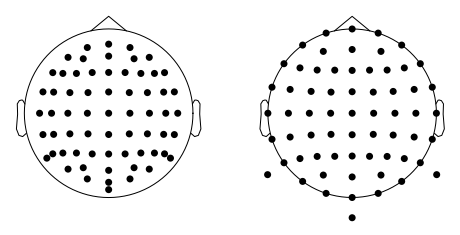

Text(0.5, 1.0, 'EEGLAB channel projection')

In [5]:
# create a two-panel figure with some space for the titles at the top
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

# we plot the channel positions with default sphere - the mne way
fake_evoked.plot_sensors(axes=ax[0], show=False)

# in the second panel we plot the positions using the EEGLAB reference sphere
fake_evoked.plot_sensors(sphere=(x, y, z, radius), axes=ax[1], show=True)

# add titles
ax[0].set_title('MNE channel projection', fontweight='bold')
ax[1].set_title('EEGLAB channel projection', fontweight='bold')

## Topomaps (topoplots)

As the last step we do the same, but plotting the topomaps. These will not
be particularly interesting as they will show random data but hopefully you
will see the difference.



Text(0.5, 1.0, 'EEGLAB-without Line')

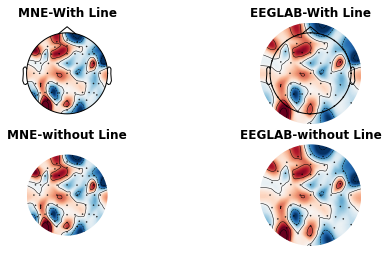

In [6]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

mne.viz.plot_topomap(fake_evoked.data[:, 0], fake_evoked.info, axes=ax[0,0],
                     show=False)
mne.viz.plot_topomap(fake_evoked.data[:, 0], fake_evoked.info, axes=ax[0,1],
                     show=False, sphere=(x, y, z, radius))

mne.viz.plot_topomap(fake_evoked.data[:, 0], fake_evoked.info, axes=ax[1,0],
                     show=False)
mne.viz.plot_topomap(fake_evoked.data[:, 0], fake_evoked.info, axes=ax[1,1],
                     show=False, sphere=(x, y, z, radius))

# del line of topoplot
del ax[1,0].lines[:4]
del ax[1,1].lines[:4]
# add titles
ax[0,0].set_title('MNE-With Line', fontweight='bold')
ax[0,1].set_title('EEGLAB-With Line', fontweight='bold')
ax[1,0].set_title('MNE-without Line', fontweight='bold')
ax[1,1].set_title('EEGLAB-without Line', fontweight='bold')